In [0]:
%matplotlib inline
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from torchvision import transforms,datasets
import torch.optim as optim
from torch.autograd import Variable
import torchvision



import matplotlib.pyplot as plt
import time

In [0]:
import torch
import torchvision

In [0]:
apply_transform = transforms.Compose([transforms.Resize(32), transforms.ToTensor()])
BatchSize = 256 # change according to system specs
BatchSize2 = 1024 # change according to system specs


trainset = datasets.MNIST(root='./MNIST', train=True, download=True, transform=apply_transform)
trainLoader = torch.utils.data.DataLoader(trainset, batch_size=BatchSize,
                                          shuffle=True, num_workers=4) # Creating dataloader

# Validation set with random rotations in the range [-90,90]
testset = datasets.MNIST(root='./MNIST', train=False, download=True, transform=apply_transform)
testLoader = torch.utils.data.DataLoader(testset, batch_size=BatchSize,
                                         shuffle=False, num_workers=4) # Creating dataloader

trainset2 = datasets.MNIST(root='./MNIST', train=True, download=True, transform=apply_transform)
trainLoader2 = torch.utils.data.DataLoader(trainset2, batch_size=BatchSize2,
                                          shuffle=True, num_workers=4) # Creating dataloader

# Validation set with random rotations in the range [-90,90]
testset2 = datasets.MNIST(root='./MNIST', train=False, download=True, transform=apply_transform)
testLoader2 = torch.utils.data.DataLoader(testset2, batch_size=BatchSize2,
                                         shuffle=False, num_workers=4) # Creating dataloader                                         

In [18]:
# Size of train and test datasets
print('No. of samples in train set: '+str(len(trainLoader.dataset)))
print('No. of samples in test set: '+str(len(testLoader.dataset)))
# Size of train and test datasets
print('No. of samples in train set2: '+str(len(trainLoader2.dataset)))
print('No. of samples in test set2: '+str(len(testLoader2.dataset)))

No. of samples in train set: 60000
No. of samples in test set: 10000
No. of samples in train set2: 60000
No. of samples in test set2: 10000


In [0]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5)
        self.pool1 = nn.MaxPool2d(kernel_size=2,stride=2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.pool2 = nn.MaxPool2d(kernel_size=2,stride=2)        
        self.fc1 = nn.Linear(400, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = x.view(-1, 400)
        x = F.relu(self.fc1(x)) 
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x,dim=1)

In [20]:
use_gpu = torch.cuda.is_available()
net1= LeNet()
net2= LeNet()
net3= LeNet()

print(net1)
print(net2)
print(net3)

if use_gpu:
    print('GPU is avaialble!')
    net1 = net1.cuda()
    net2 = net2.cuda()
    net3 = net3.cuda()
    

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)
LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)
LeNet(
  (conv1): Conv2d(1, 6, ker

In [21]:
criterion = nn.CrossEntropyLoss() 
learning_rate1 = 0.1
optimizer1 = optim.SGD(net1.parameters(), lr=learning_rate1, momentum=0.9) # SGD 
num_epochs = 50

train_loss = []
train_acc = []
for epoch in range(num_epochs):
    
    running_loss = 0.0 
    running_corr = 0
        
    for i,data in enumerate(trainLoader):
        inputs,labels = data
        if use_gpu:
            inputs, labels = inputs.cuda(),labels.cuda() 
        # Initializing model gradients to zero
        optimizer1.zero_grad() 
        # Data feed-forward through the network
        outputs1 = net1(inputs)
        # Predicted class is the one with maximum probability
        preds1 = torch.argmax(outputs1,dim=1)
        # Finding the loss
        loss = criterion(outputs1, labels)
        # Accumulating the loss for each batch
        running_loss += loss 
        # Accumulate number of correct predictions
        running_corr += torch.sum(preds1==labels)    
        
    totalLoss1 = running_loss/(i+1)
    # Calculating gradients
    totalLoss1.backward()
    # Updating the model parameters
    # Updating the model parameters
    optimizer1.step()
        
    epoch_loss = running_loss.item()/(i+1)   #Total loss for one epoch
    epoch_acc = running_corr.item()/60000
    
    
         
    train_loss.append(epoch_loss) #Saving the loss over epochs for plotting the graph
    train_acc.append(epoch_acc) #Saving the accuracy over epochs for plotting the graph
       
        
    print('Epoch {:.0f}/{:.0f} : Training loss: {:.4f} | Training Accuracy: {:.4f}'.format(epoch+1,num_epochs,epoch_loss,epoch_acc*100))

Epoch 1/50 : Training loss: 2.3069 | Training Accuracy: 9.0350
Epoch 2/50 : Training loss: 2.3066 | Training Accuracy: 9.0350
Epoch 3/50 : Training loss: 2.3062 | Training Accuracy: 9.0417
Epoch 4/50 : Training loss: 2.3057 | Training Accuracy: 9.2017
Epoch 5/50 : Training loss: 2.3051 | Training Accuracy: 11.1300
Epoch 6/50 : Training loss: 2.3044 | Training Accuracy: 12.7733
Epoch 7/50 : Training loss: 2.3037 | Training Accuracy: 10.6250
Epoch 8/50 : Training loss: 2.3030 | Training Accuracy: 9.8967
Epoch 9/50 : Training loss: 2.3023 | Training Accuracy: 9.8717
Epoch 10/50 : Training loss: 2.3015 | Training Accuracy: 9.8717
Epoch 11/50 : Training loss: 2.3007 | Training Accuracy: 12.5450
Epoch 12/50 : Training loss: 2.3000 | Training Accuracy: 11.8117
Epoch 13/50 : Training loss: 2.2993 | Training Accuracy: 11.2367
Epoch 14/50 : Training loss: 2.2985 | Training Accuracy: 11.2367
Epoch 15/50 : Training loss: 2.2978 | Training Accuracy: 11.2367
Epoch 16/50 : Training loss: 2.2971 | Tra

In [ ]:
# 6b and 6c

Text(0, 0.5, 'Training')

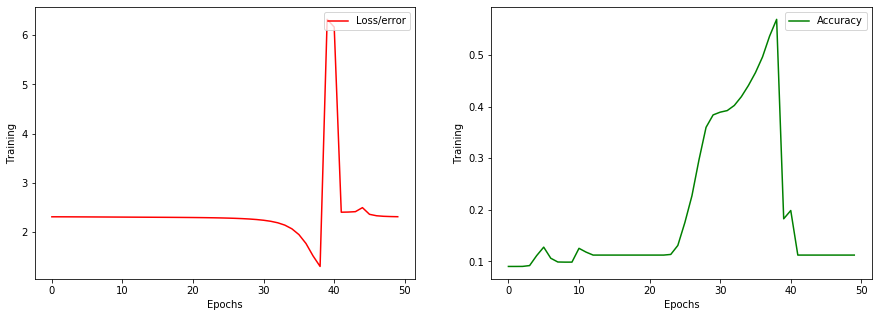

In [22]:
fig = plt.figure(figsize=[15,5]) 
plt.subplot(121)
plt.plot(range(num_epochs),train_loss,'r-',label='Loss/error') 
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Training')
plt.subplot(122)
plt.plot(range(num_epochs),train_acc,'g-',label='Accuracy') 
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Training')

In [23]:
correct_pred1=0
for data in testLoader:
    inputs,labels = data
    if use_gpu:
        inputs, labels = inputs.cuda(),labels.cuda()
    # Feedforward train data batch through model
    output = net1(inputs) 
    # Predicted class is the one with maximum probability
    preds1 = torch.argmax(output,dim=1)
    correct_pred1 += torch.sum(preds1==labels)

test_accuracy = correct_pred1.item()/10000.0
print('Testing accuracy (Batch size=256, lr=0.1 = ',test_accuracy*100) #for bathch1

Testing accuracy (Batch size=256, lr=0.1 =  11.35


In [24]:
criterion = nn.CrossEntropyLoss() 
learning_rate2 = 0.1
optimizer2 = optim.SGD(net2.parameters(), lr=learning_rate2, momentum=0.9) # SGD
num_epochs2 = 50

train_loss2 = []
train_acc2 = []
for epoch in range(num_epochs2):
    
    running_loss = 0.0 
    running_corr = 0
        
    for i,data in enumerate(trainLoader2):
        inputs,labels = data
        if use_gpu:
            inputs, labels = inputs.cuda(),labels.cuda() 
        # Initializing model gradients to zero
        optimizer2.zero_grad() 
        # Data feed-forward through the network
        outputs2 = net2(inputs)
        # Predicted class is the one with maximum probability
        preds2 = torch.argmax(outputs2,dim=1)
        # Finding the loss
        loss = criterion(outputs2, labels)
        # Accumulating the loss for each batch
        running_loss += loss 
        # Accumulate number of correct predictions
        running_corr += torch.sum(preds2==labels)    
        
    totalLoss2 = running_loss/(i+1)
    # Calculating gradients
    totalLoss2.backward()
    # Updating the model parameters
    # Updating the model parameters
    optimizer2.step()
        
    epoch_loss = running_loss.item()/(i+1)   #Total loss for one epoch
    epoch_acc = running_corr.item()/60000
    
    
         
    train_loss2.append(epoch_loss) #Saving the loss over epochs for plotting the graph
    train_acc2.append(epoch_acc) #Saving the accuracy over epochs for plotting the graph
       
        
    print('Epoch {:.0f}/{:.0f} : Training loss: {:.4f} | Training Accuracy: {:.4f}'.format(epoch+1,num_epochs2,epoch_loss,epoch_acc*100))

Epoch 1/50 : Training loss: 2.3042 | Training Accuracy: 9.9117
Epoch 2/50 : Training loss: 2.3038 | Training Accuracy: 9.9583
Epoch 3/50 : Training loss: 2.3030 | Training Accuracy: 10.1233
Epoch 4/50 : Training loss: 2.3019 | Training Accuracy: 10.6500
Epoch 5/50 : Training loss: 2.3005 | Training Accuracy: 12.2600
Epoch 6/50 : Training loss: 2.2990 | Training Accuracy: 15.6817
Epoch 7/50 : Training loss: 2.2973 | Training Accuracy: 19.8633
Epoch 8/50 : Training loss: 2.2954 | Training Accuracy: 24.8250
Epoch 9/50 : Training loss: 2.2934 | Training Accuracy: 29.5867
Epoch 10/50 : Training loss: 2.2910 | Training Accuracy: 34.1400
Epoch 11/50 : Training loss: 2.2883 | Training Accuracy: 33.4050
Epoch 12/50 : Training loss: 2.2851 | Training Accuracy: 28.9250
Epoch 13/50 : Training loss: 2.2813 | Training Accuracy: 26.5033
Epoch 14/50 : Training loss: 2.2766 | Training Accuracy: 25.8233
Epoch 15/50 : Training loss: 2.2707 | Training Accuracy: 25.8233
Epoch 16/50 : Training loss: 2.2629 

Text(0, 0.5, 'Training Accuracy')

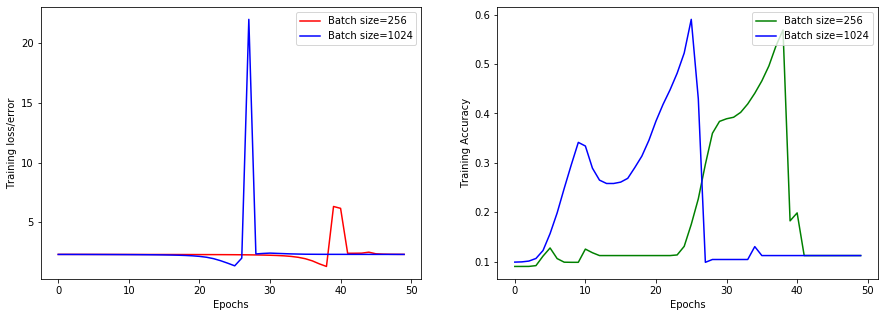

In [25]:
fig = plt.figure(figsize=[15,5]) 
plt.subplot(121)
plt.plot(range(num_epochs),train_loss,'r-',label='Batch size=256') 
plt.plot(range(num_epochs2),train_loss2,'r-',color='blue',label='Batch size=1024') 

plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Training loss/error')
plt.subplot(122)
plt.plot(range(num_epochs),train_acc,'g-',label='Batch size=256') 
plt.plot(range(num_epochs2),train_acc2,'g-', color='blue',label='Batch size=1024') #learning rate in both is same
 
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')

In [26]:
correct_pred2=0
for data in testLoader2:
    inputs,labels = data
    if use_gpu:
        inputs, labels = inputs.cuda(),labels.cuda()
    # Feedforward train data batch through model
    output = net2(inputs) 
    # Predicted class is the one with maximum probability
    preds2 = torch.argmax(output,dim=1)
    correct_pred2 += torch.sum(preds2==labels)

test_accuracy2 = correct_pred2.item()/10000.0
print('Testing accuracy (Batch size=1024, lr=0.1) = ',test_accuracy2*100) #for bathch1

Testing accuracy (Batch size=1024, lr=0.1) =  11.35


In [27]:
criterion = nn.CrossEntropyLoss() 
learning_rate3 = 0.01
optimizer3 = optim.SGD(net3.parameters(), lr=learning_rate3, momentum=0.9) # SGD
num_epochs3 = 50

train_loss3 = []
train_acc3 = []
for epoch in range(num_epochs3):
    
    running_loss = 0.0 
    running_corr = 0
        
    for i,data in enumerate(trainLoader):
        inputs,labels = data
        if use_gpu:
            inputs, labels = inputs.cuda(),labels.cuda() 
        # Initializing model gradients to zero
        optimizer3.zero_grad() 
        # Data feed-forward through the network
        outputs3 = net3(inputs)
        # Predicted class is the one with maximum probability
        preds3 = torch.argmax(outputs3,dim=1)
        # Finding the loss
        loss = criterion(outputs3, labels)
        # Accumulating the loss for each batch
        running_loss += loss 
        # Accumulate number of correct predictions
        running_corr += torch.sum(preds3==labels)    
        
    totalLoss3 = running_loss/(i+1)
    # Calculating gradients
    totalLoss3.backward()
    # Updating the model parameters
    # Updating the model parameters
    optimizer3.step()
        
    epoch_loss = running_loss.item()/(i+1)   #Total loss for one epoch
    epoch_acc = running_corr.item()/60000
    
    
         
    train_loss3.append(epoch_loss) #Saving the loss over epochs for plotting the graph
    train_acc3.append(epoch_acc) #Saving the accuracy over epochs for plotting the graph
       
        
    print('Epoch {:.0f}/{:.0f} : Training loss: {:.4f} | Training Accuracy: {:.4f}'.format(epoch+1,num_epochs3,epoch_loss,epoch_acc*100))

Epoch 1/50 : Training loss: 2.3026 | Training Accuracy: 8.1917
Epoch 2/50 : Training loss: 2.3026 | Training Accuracy: 8.2500
Epoch 3/50 : Training loss: 2.3025 | Training Accuracy: 8.3583
Epoch 4/50 : Training loss: 2.3024 | Training Accuracy: 8.4950
Epoch 5/50 : Training loss: 2.3022 | Training Accuracy: 8.6683
Epoch 6/50 : Training loss: 2.3021 | Training Accuracy: 8.8750
Epoch 7/50 : Training loss: 2.3019 | Training Accuracy: 9.1433
Epoch 8/50 : Training loss: 2.3017 | Training Accuracy: 9.3767
Epoch 9/50 : Training loss: 2.3014 | Training Accuracy: 9.6133
Epoch 10/50 : Training loss: 2.3012 | Training Accuracy: 9.8767
Epoch 11/50 : Training loss: 2.3009 | Training Accuracy: 10.1317
Epoch 12/50 : Training loss: 2.3007 | Training Accuracy: 10.4217
Epoch 13/50 : Training loss: 2.3004 | Training Accuracy: 10.6417
Epoch 14/50 : Training loss: 2.3001 | Training Accuracy: 10.8450
Epoch 15/50 : Training loss: 2.2997 | Training Accuracy: 11.0633
Epoch 16/50 : Training loss: 2.2995 | Traini

Text(0, 0.5, 'Training Accuracy')

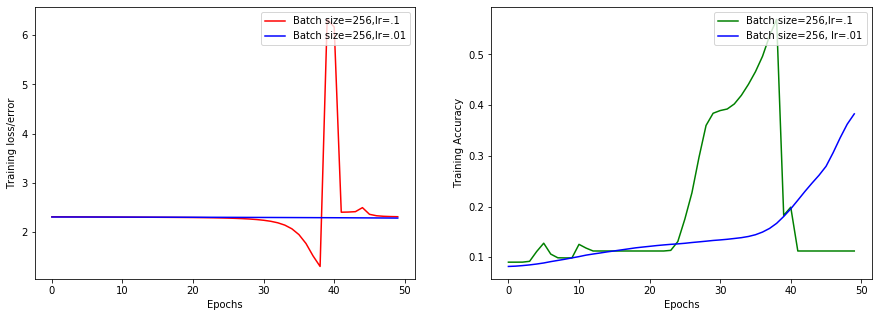

In [30]:
fig = plt.figure(figsize=[15,5]) 
plt.subplot(121)
plt.plot(range(num_epochs),train_loss,'r-',label='Batch size=256,lr=.1') 
plt.plot(range(num_epochs),train_loss3,'r-',color='blue',label='Batch size=256,lr=.01') 

plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Training loss/error')
plt.subplot(122)
plt.plot(range(num_epochs),train_acc,'g-',label='Batch size=256,lr=.1') 
plt.plot(range(num_epochs),train_acc3,'g-', color='blue',label='Batch size=256, lr=.01') 
 
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')

In [31]:
correct_pred3=0
for data in testLoader:
    inputs,labels = data
    if use_gpu:
        inputs, labels = inputs.cuda(),labels.cuda()
    # Feedforward train data batch through model
    output = net3(inputs) 
    # Predicted class is the one with maximum probability
    preds3 = torch.argmax(output,dim=1)
    correct_pred3 += torch.sum(preds3==labels)

test_accuracy3 = correct_pred3.item()/10000.0
print('Testing accuracy (Batch size=256, lr=.01) = ',test_accuracy3*100) #for bathch1

Testing accuracy (Batch size=256, lr=.01) =  38.6
